# Import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Read Data

In [2]:
df_trainf = pd.read_csv('dataset/train_features.csv')
df_trainf.head(3)

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN


In [3]:
df_trainf.shape

(3817, 16)

In [4]:
df_trainl = pd.read_csv('dataset/train_labels.csv')
df_trainl.head(3)

,jumlah_promosi
0,2
1,0
2,1


In [5]:
print(df_trainl.shape)

(3817, 1)


In [6]:
df_test = pd.read_csv('dataset/test_features.csv')
df_test.head(3)

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06


In [7]:
df_test.shape

(3818, 17)

In [8]:
df_train = pd.concat([df_trainf.reset_index(drop=True),df_trainl.reset_index(drop=True)], axis=1)
df_train.head(3)

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1


In [9]:
df_submission = pd.read_csv('dataset/submission_format.csv')
df_submission.head(3)

,ID,jumlah_promosi
0,2241,6
1,2274,6
2,1107,6


# Data Cleaning

## Handling Missing Values

In [10]:
df_train.isnull().sum()/(len(df_train))*100

tahun_kelahiran             0.000000
pendidikan                  4.951533
status_pernikahan           5.554100
pendapatan                  4.977731
jumlah_anak_balita          4.977731
jumlah_anak_remaja          5.344511
terakhir_belanja            4.506157
belanja_buah                4.741944
belanja_daging              4.663348
belanja_ikan                5.056327
belanja_kue                 5.606497
pembelian_diskon            4.663348
pembelian_web               4.322767
pembelian_toko              4.427561
keluhan                     5.134923
tanggal_menjadi_anggota    72.098507
jumlah_promosi              0.000000
dtype: float64

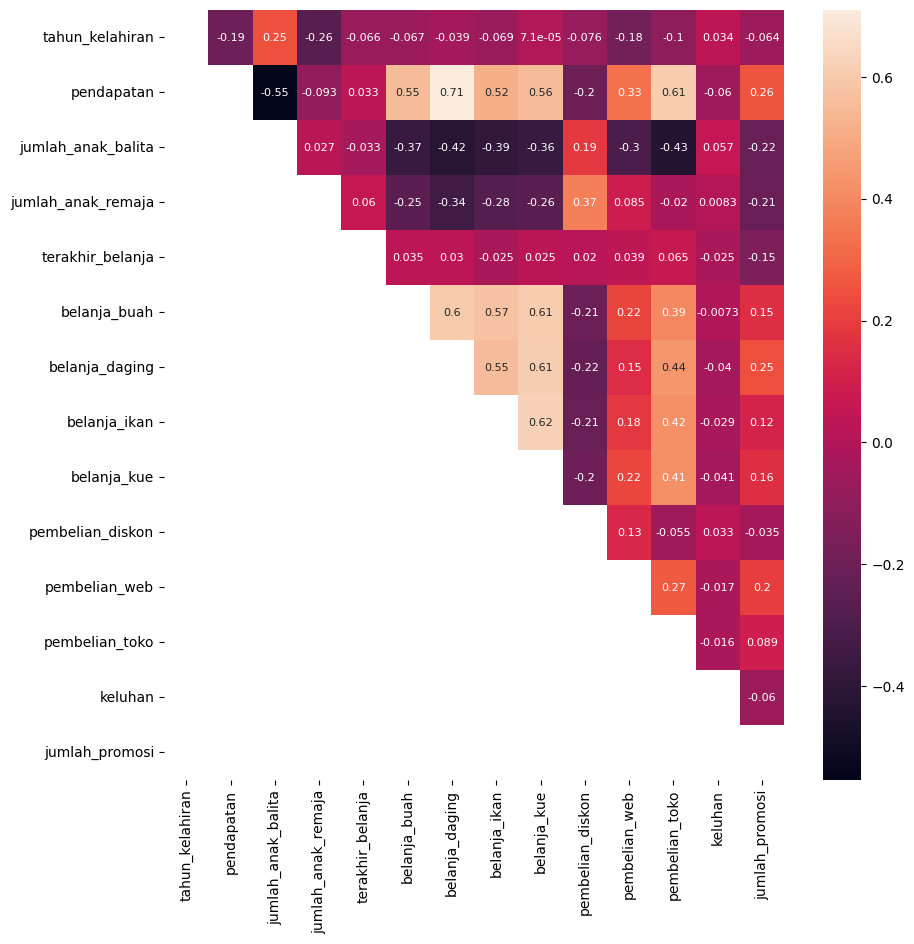

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.select_dtypes(include='number').corr(), annot=True, annot_kws={'size':8}, mask=np.tril(df_train.corr()))
plt.show()

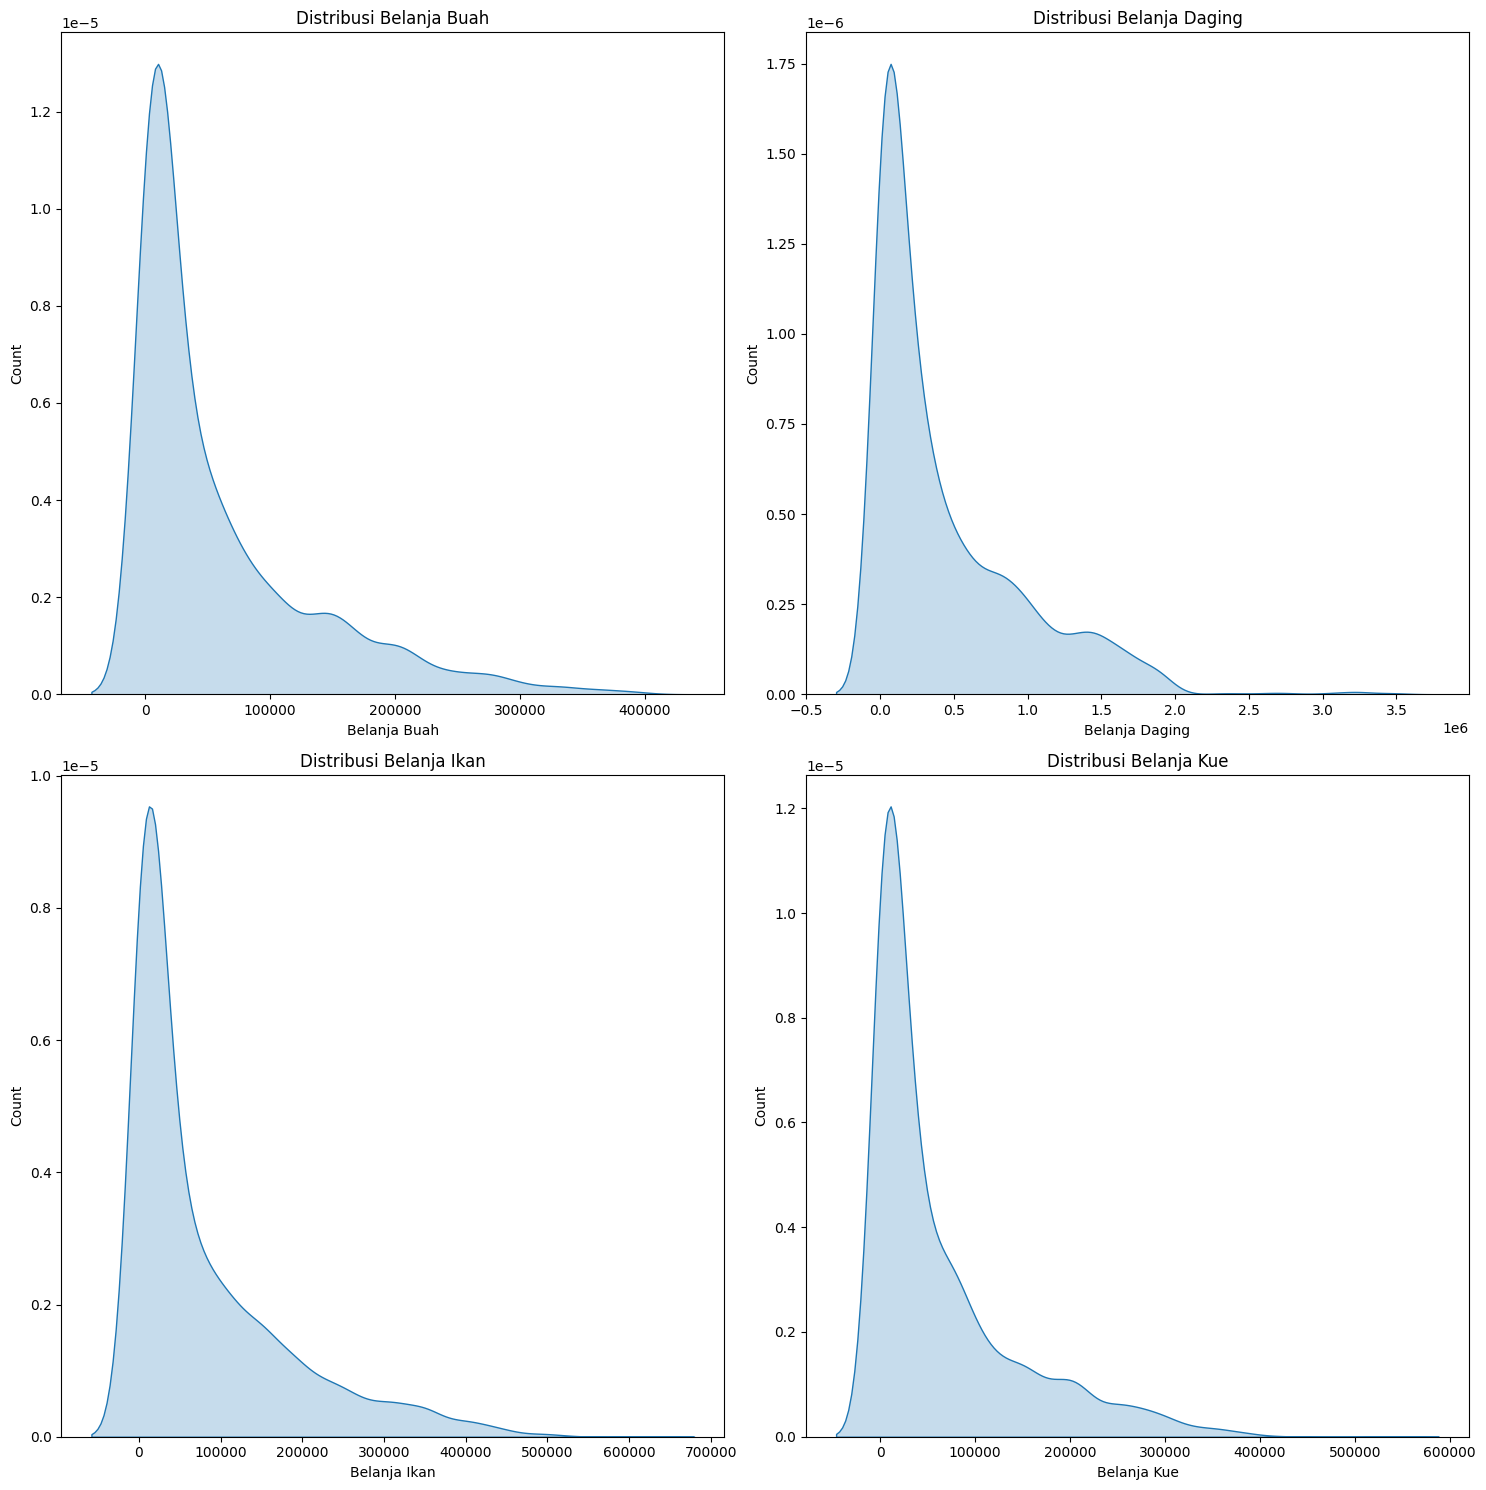

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.kdeplot(data=df_train['belanja_buah'], shade=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribusi Belanja Buah')
axs[0, 0].set_xlabel('Belanja Buah')
axs[0, 0].set_ylabel('Count')

sns.kdeplot(data=df_train['belanja_daging'], shade=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribusi Belanja Daging')
axs[0, 1].set_xlabel('Belanja Daging')
axs[0, 1].set_ylabel('Count')

sns.kdeplot(data=df_train['belanja_ikan'], shade=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribusi Belanja Ikan')
axs[1, 0].set_xlabel('Belanja Ikan')
axs[1, 0].set_ylabel('Count')

sns.kdeplot(data=df_train['belanja_kue'], shade=True, ax=axs[1,1])
axs[1,1].set_title('Distribusi Belanja Kue')
axs[1,1].set_xlabel('Belanja Kue')
axs[1,1].set_ylabel('Count')

plt.tight_layout()

plt.show()

In [13]:
df_train[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']] = \
    df_train[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].fillna(df_train.median().round(1))

df_train

C:\Users\GF63\AppData\Local\Temp\ipykernel_26304\195069448.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].fillna(df_train.median().round(1))


,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,Magister,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN,5
3813,1947,Doktor,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,36054.5,0.0,3.0,6.0,3.0,0.0,2014-06-09,1
3814,1974,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0
3815,1957,SMA,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,27795.0,4.0,5.0,4.0,0.0,2013-06-30,0


In [14]:
knn_imputer = KNNImputer(n_neighbors=5)

columns_to_impute = ['pendapatan']

df_train[columns_to_impute] = knn_imputer.fit_transform(df_train[columns_to_impute])

In [15]:
df_train.isnull().sum()/(len(df_train))*100

tahun_kelahiran             0.000000
pendidikan                  4.951533
status_pernikahan           5.554100
pendapatan                  0.000000
jumlah_anak_balita          4.977731
jumlah_anak_remaja          5.344511
terakhir_belanja            4.506157
belanja_buah                0.000000
belanja_daging              0.000000
belanja_ikan                0.000000
belanja_kue                 0.000000
pembelian_diskon            4.663348
pembelian_web               4.322767
pembelian_toko              4.427561
keluhan                     5.134923
tanggal_menjadi_anggota    72.098507
jumlah_promosi              0.000000
dtype: float64

In [16]:
df_train['terakhir_belanja'].describe()

count    3645.000000
mean       47.231550
std        27.068512
min         0.000000
25%        25.000000
50%        47.000000
75%        69.000000
max       128.000000
Name: terakhir_belanja, dtype: float64

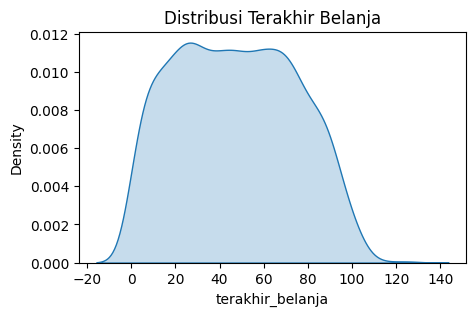

In [17]:
plt.figure(figsize=(5,3))
sns.kdeplot(data=df_train['terakhir_belanja'], shade=True)
plt.title('Distribusi Terakhir Belanja')
plt.show()

In [18]:
df_train['terakhir_belanja'].fillna(df_train['terakhir_belanja'].mean().round(1), inplace=True)

In [19]:
knn_imputer = KNNImputer(n_neighbors=5)

columns_to_impute = ['pembelian_diskon', 'pembelian_web', 'pembelian_toko']

df_train[columns_to_impute] = knn_imputer.fit_transform(df_train[columns_to_impute])

In [20]:
df_train.isnull().sum()

tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                    0
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja              0
belanja_buah                  0
belanja_daging                0
belanja_ikan                  0
belanja_kue                   0
pembelian_diskon              0
pembelian_web                 0
pembelian_toko                0
keluhan                     196
tanggal_menjadi_anggota    2752
jumlah_promosi                0
dtype: int64

In [21]:
df_train1 = df_train.drop(columns=['jumlah_anak_balita', 'jumlah_anak_remaja', 'keluhan', 'tanggal_menjadi_anggota'])

# EDA

## Basic Checking

In [22]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tahun_kelahiran    3817 non-null   int64  
 1   pendidikan         3628 non-null   object 
 2   status_pernikahan  3605 non-null   object 
 3   pendapatan         3817 non-null   float64
 4   terakhir_belanja   3817 non-null   float64
 5   belanja_buah       3817 non-null   float64
 6   belanja_daging     3817 non-null   float64
 7   belanja_ikan       3817 non-null   float64
 8   belanja_kue        3817 non-null   float64
 9   pembelian_diskon   3817 non-null   float64
 10  pembelian_web      3817 non-null   float64
 11  pembelian_toko     3817 non-null   float64
 12  jumlah_promosi     3817 non-null   int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 387.8+ KB


In [23]:
# check unique data
df_train1.nunique()

tahun_kelahiran        76
pendidikan              6
status_pernikahan       6
pendapatan           3623
terakhir_belanja      114
belanja_buah         2536
belanja_daging       2951
belanja_ikan         2628
belanja_kue          2475
pembelian_diskon       38
pembelian_web          42
pembelian_toko         38
jumlah_promosi          7
dtype: int64

In [24]:
# check null its feature
df_train1.isnull().sum()

tahun_kelahiran        0
pendidikan           189
status_pernikahan    212
pendapatan             0
terakhir_belanja       0
belanja_buah           0
belanja_daging         0
belanja_ikan           0
belanja_kue            0
pembelian_diskon       0
pembelian_web          0
pembelian_toko         0
jumlah_promosi         0
dtype: int64

asumming too many null data in tanggal_menjadi_anggota I will try not to use that feature, because I have no idea at all on how to fill the null

C:\Users\GF63\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

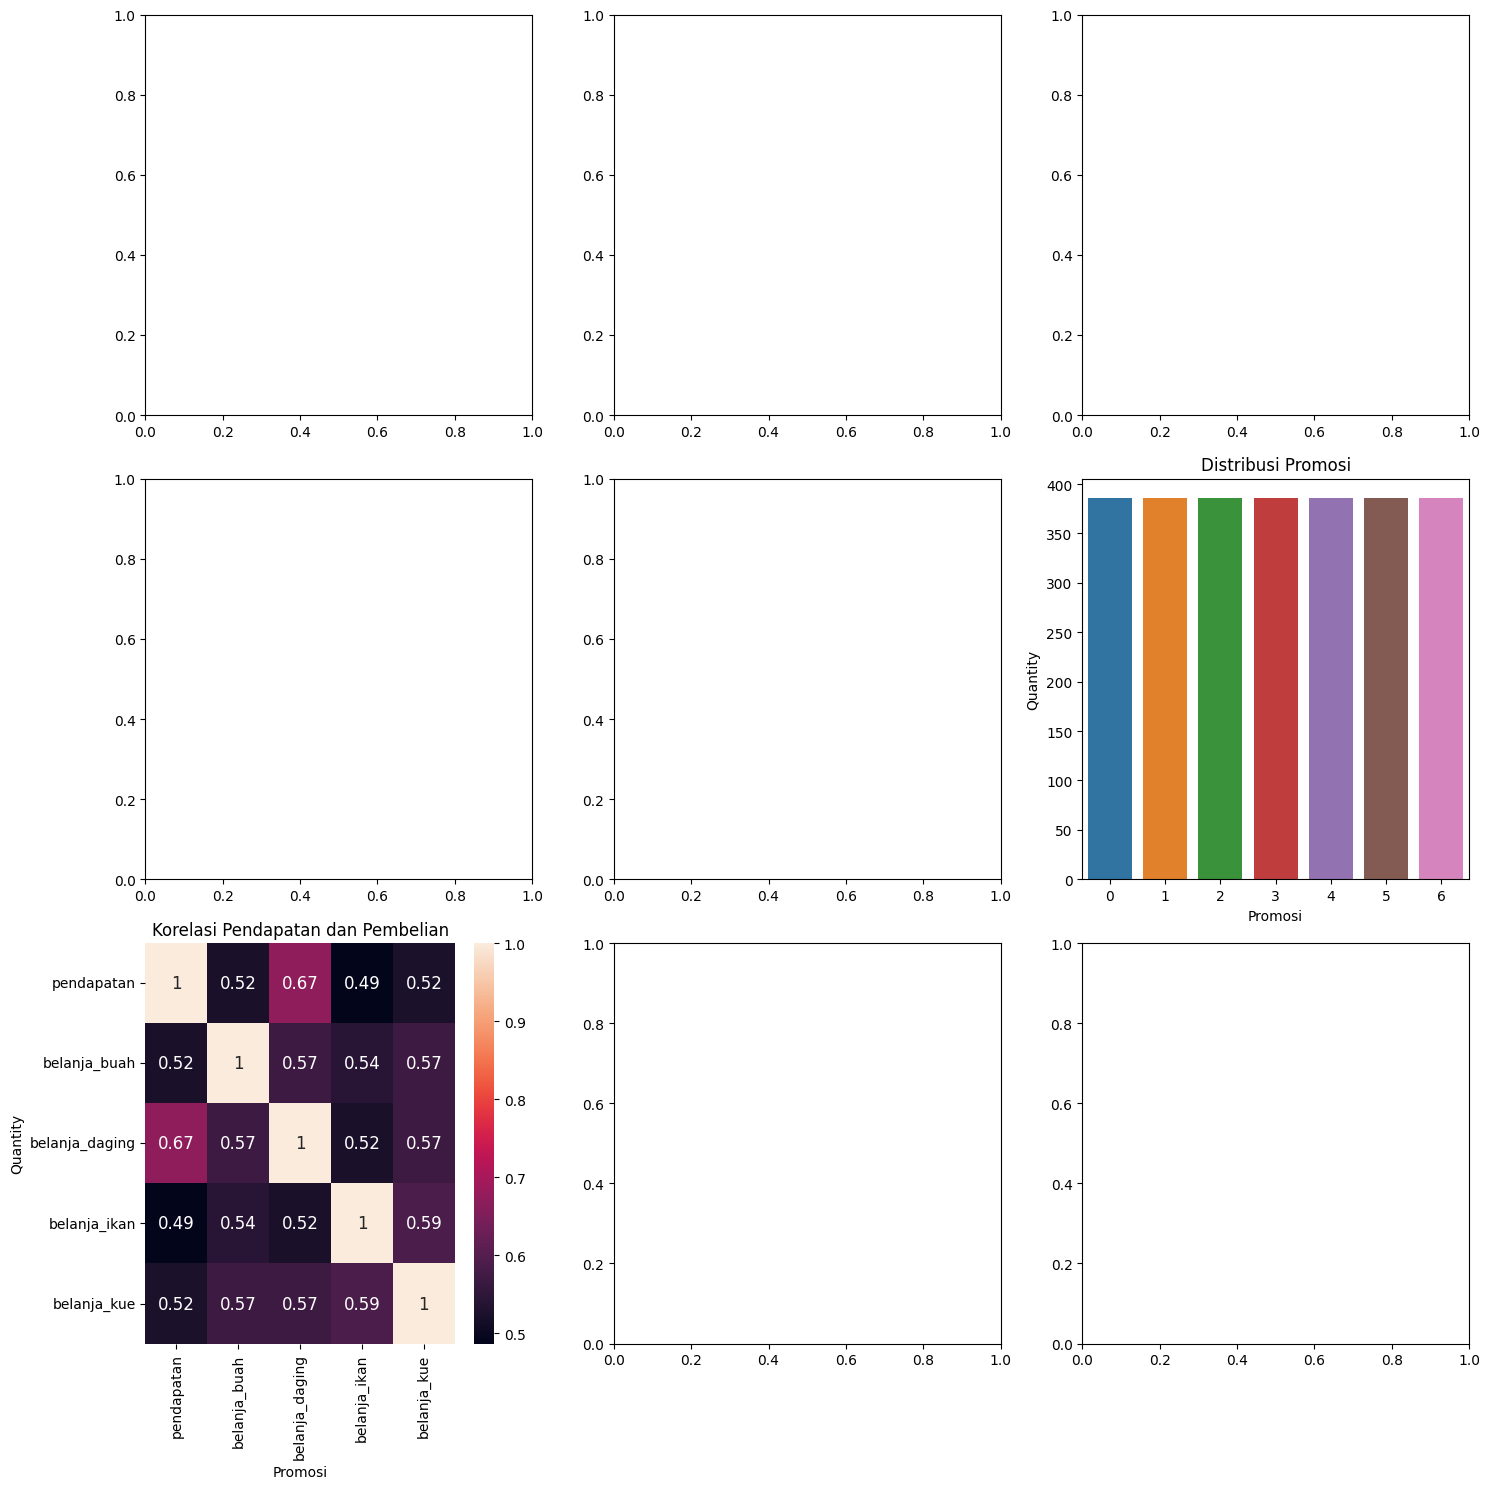

In [56]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# sns.histplot(df_train1['pendidikan'], ax=axs[0,0])
# axs[0,0].set_title('Hist Pendidikan')
# axs[0,0].set_xlabel('Tingkat Pendidikan')
# axs[0,0].set_ylabel('Quantity')

# # jumlah_anak = df_train1[['jumlah_anak_balita', 'jumlah_anak_remaja']].sum(axis=1)
# # sns.countplot(jumlah_anak, ax=axs[0,1])
# # axs[0,1].set_title('Count Jumlah Anak')
# # axs[0,1].set_xlabel('Jumlah anak total')
# # axs[0,1].set_ylabel('Quantity')

# pendapatan = df_train1['pendapatan'] / 1000000
# sns.histplot(pendapatan, ax=axs[0,2])
# axs[0,2].set_title('Distribusi Income')
# axs[0,2].set_xlabel('Income')
# axs[0,2].set_ylabel('Quantity')

# total_belanja = df_train1[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].sum(axis=1)
# total_belanja = total_belanja / 100000
# sns.histplot(total_belanja, ax=axs[1,0])
# axs[1,0].set_title('Distribusi Total Belanja')
# axs[1,0].set_xlabel('Total Belanja')
# axs[1,0].set_ylabel('Quantity')

# metode_penjualan = df_train1[['pembelian_diskon', 'pembelian_web', 'pembelian_toko']].sum()
# metode_penjualan = pd.DataFrame(metode_penjualan, columns=['Total Pembelian'])
# metode_penjualan.reset_index(inplace=True)
# metode_penjualan.rename(columns={'index': 'Category'}, inplace=True)
# sns.barplot(metode_penjualan['Category'], metode_penjualan['Total Pembelian'], ax=axs[1,1])
# axs[1,1].set_title('Distribusi Metode Penjualan')
# axs[1,1].set_xlabel('Total Pembelian')
# axs[1,1].set_ylabel('Total Pembelian per category')

promo = balanced_data['jumlah_promosi'].value_counts().sort_index()
sns.barplot(promo.index, promo.values, ax=axs[1,2])
axs[1,2].set_title('Distribusi Promosi')
axs[1,2].set_xlabel('Promosi')
axs[1,2].set_ylabel('Quantity')

sns.heatmap(df_train1[['pendapatan', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].corr(), annot=True, annot_kws={'size':12}, ax=axs[2,0])
axs[2,0].set_title('Korelasi Pendapatan dan Pembelian')
axs[2,0].set_xlabel('Promosi')
axs[2,0].set_ylabel('Quantity')

# # Scatter plot
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='pendapatan', y='total_belanja', data=df_train1)
# plt.title('Income vs Total Expenses (Scatter Plot)')
# plt.xlabel('Income')
# plt.ylabel('Total Expenses')

plt.tight_layout()
plt.show

## Encoding

In [26]:
# pendidikan column
df_train1['pendidikan'].value_counts()

Sarjana     1841
Magister     856
SMA          435
Doktor       403
SMP           91
5              2
Name: pendidikan, dtype: int64

In [27]:
df_train1.drop(df_train1[df_train1['pendidikan'] == '5'].index, inplace=True)
df_train1.shape

(3815, 13)

In [28]:
pendidikan = df_train1['pendidikan'].values.reshape(-1, 1)
print(pendidikan)

[['Sarjana']
 ['Sarjana']
 ['Sarjana']
 ...
 ['Magister']
 ['SMA']
 ['Sarjana']]


In [29]:
df_train1['pendidikan'] = df_train1['pendidikan'].fillna('unknown')

In [30]:
education_mapping = {
    'unknown':-1,
    'SMP': 0,
    'SMA': 1,
    'Sarjana': 2,
    'Magister': 3,
    'Doktor': 4
}

# Map the education levels to numerical values using the dictionary
df_train1['pendidikan'] = df_train1['pendidikan'].map(education_mapping)

In [31]:
# status pernikahan
df_train1['status_pernikahan'].value_counts()

Rencana Menikah    1271
Menikah            1113
Sendiri             964
Cerai               214
Cerai Mati           40
5                     1
Name: status_pernikahan, dtype: int64

In [32]:
df_train1.drop(df_train1[df_train1['status_pernikahan']=='5'].index, inplace=True)
df_train1.shape

(3814, 13)

In [33]:
df_train1['status_pernikahan'] = df_train1['status_pernikahan'].fillna('unknown')

In [34]:
df_train1.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,jumlah_promosi
0,1979,2,Rencana Menikah,1.144832e+08,47.2,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,2
1,1950,2,Rencana Menikah,8.406300e+07,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0
2,1966,2,Menikah,1.275326e+08,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,1
3,1961,3,Rencana Menikah,1.655796e+08,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,4
4,1970,2,Rencana Menikah,1.177032e+08,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,4


In [35]:
pernikahan = df_train1[['status_pernikahan']]
pernikahan

,status_pernikahan
0,Rencana Menikah
1,Rencana Menikah
2,Menikah
3,Rencana Menikah
4,Rencana Menikah
...,...
3812,Menikah
3813,Rencana Menikah
3814,Menikah
3815,Rencana Menikah


In [36]:
hotencoder = OneHotEncoder(sparse=False)
pernikahan_encoded = hotencoder.fit_transform(pernikahan)
pernikahan_encoded

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [37]:
pernikahan_encoded_df = pd.DataFrame(pernikahan_encoded, columns=hotencoder.get_feature_names(['status']))
pernikahan_encoded_df

C:\Users\GF63\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri,status_unknown
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
3809,0.0,0.0,1.0,0.0,0.0,0.0
3810,0.0,0.0,0.0,1.0,0.0,0.0
3811,0.0,0.0,1.0,0.0,0.0,0.0
3812,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
df_train1 = pd.concat([df_train1.reset_index(drop=True), pernikahan_encoded_df.reset_index(drop=True)], axis=1)

In [39]:
df_train1.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,jumlah_promosi,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri,status_unknown
0,1979,2,Rencana Menikah,1.144832e+08,47.2,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,2,0.0,0.0,0.0,1.0,0.0,0.0
1,1950,2,Rencana Menikah,8.406300e+07,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,1966,2,Menikah,1.275326e+08,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,1,0.0,0.0,1.0,0.0,0.0,0.0
3,1961,3,Rencana Menikah,1.655796e+08,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,4,0.0,0.0,0.0,1.0,0.0,0.0
4,1970,2,Rencana Menikah,1.177032e+08,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,4,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
df_train1.drop(columns='status_pernikahan')

,tahun_kelahiran,pendidikan,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,jumlah_promosi,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri,status_unknown
0,1979,2,1.144832e+08,47.2,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,2,0.0,0.0,0.0,1.0,0.0,0.0
1,1950,2,8.406300e+07,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,1966,2,1.275326e+08,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,1,0.0,0.0,1.0,0.0,0.0,0.0
3,1961,3,1.655796e+08,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,4,0.0,0.0,0.0,1.0,0.0,0.0
4,1970,2,1.177032e+08,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,1955,3,7.819947e+07,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,5,0.0,0.0,1.0,0.0,0.0,0.0
3810,1947,4,1.093060e+08,44.0,0.0,50575.0,36054.5,0.0,3.0,6.0,3.0,1,0.0,0.0,0.0,1.0,0.0,0.0
3811,1974,3,1.046210e+08,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0,0.0,0.0,1.0,0.0,0.0,0.0
3812,1957,1,1.108500e+08,67.0,18207.0,70805.0,24276.0,27795.0,4.0,5.0,4.0,0,0.0,0.0,0.0,1.0,0.0,0.0


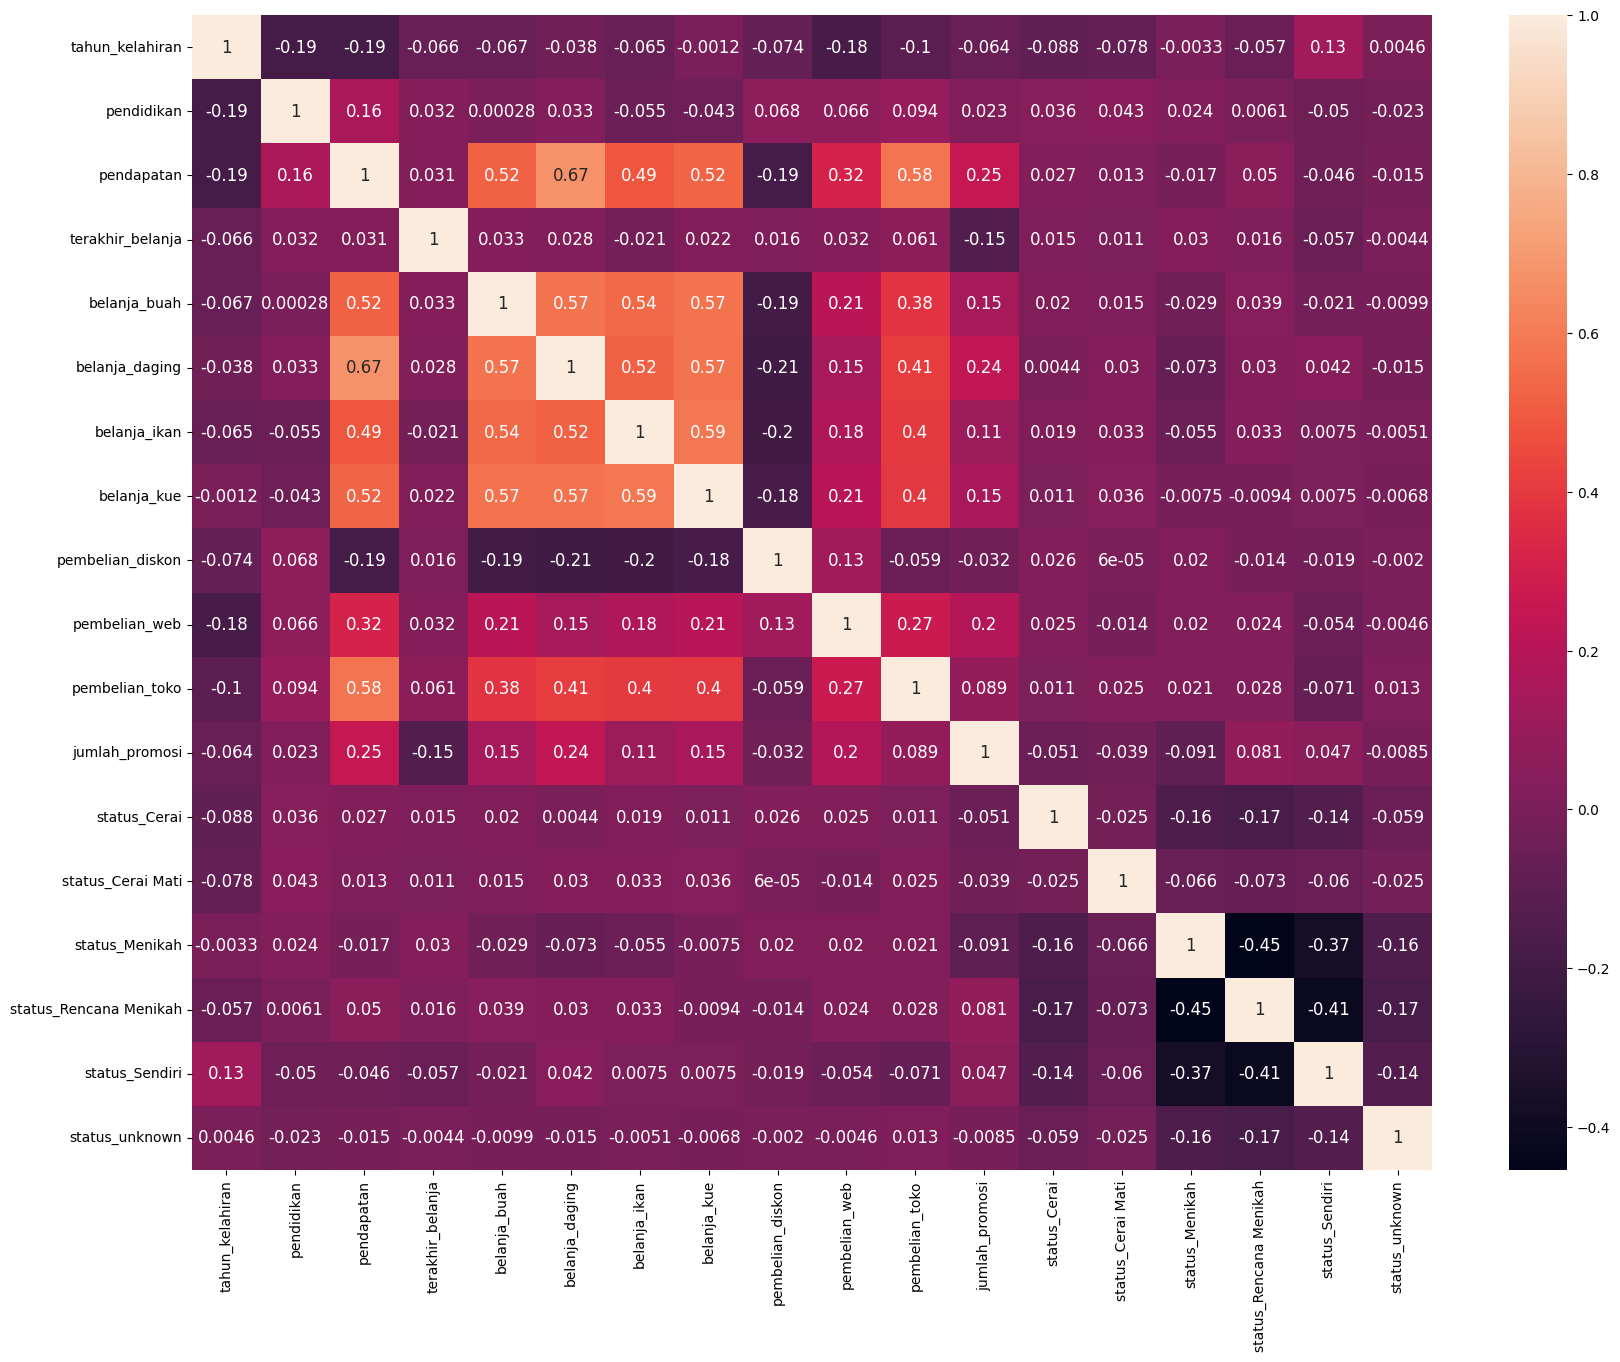

In [41]:
# Create heatmap to check correlation
cor = df_train1.corr()

plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True,annot_kws={'size':12})
plt.show()

In [42]:
df_train1['total_belanja'] = df_train1[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].sum(axis=1)

In [43]:
df_train1.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,jumlah_promosi,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri,status_unknown,total_belanja
0,1979,2,Rencana Menikah,1.144832e+08,47.2,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,2,0.0,0.0,0.0,1.0,0.0,0.0,382347.0
1,1950,2,Rencana Menikah,8.406300e+07,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0,0.0,0.0,0.0,1.0,0.0,0.0,151725.0
2,1966,2,Menikah,1.275326e+08,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,1,0.0,0.0,1.0,0.0,0.0,0.0,624985.0
3,1961,3,Rencana Menikah,1.655796e+08,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,4,0.0,0.0,0.0,1.0,0.0,0.0,1973840.0
4,1970,2,Rencana Menikah,1.177032e+08,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,4,0.0,0.0,0.0,1.0,0.0,0.0,476553.0


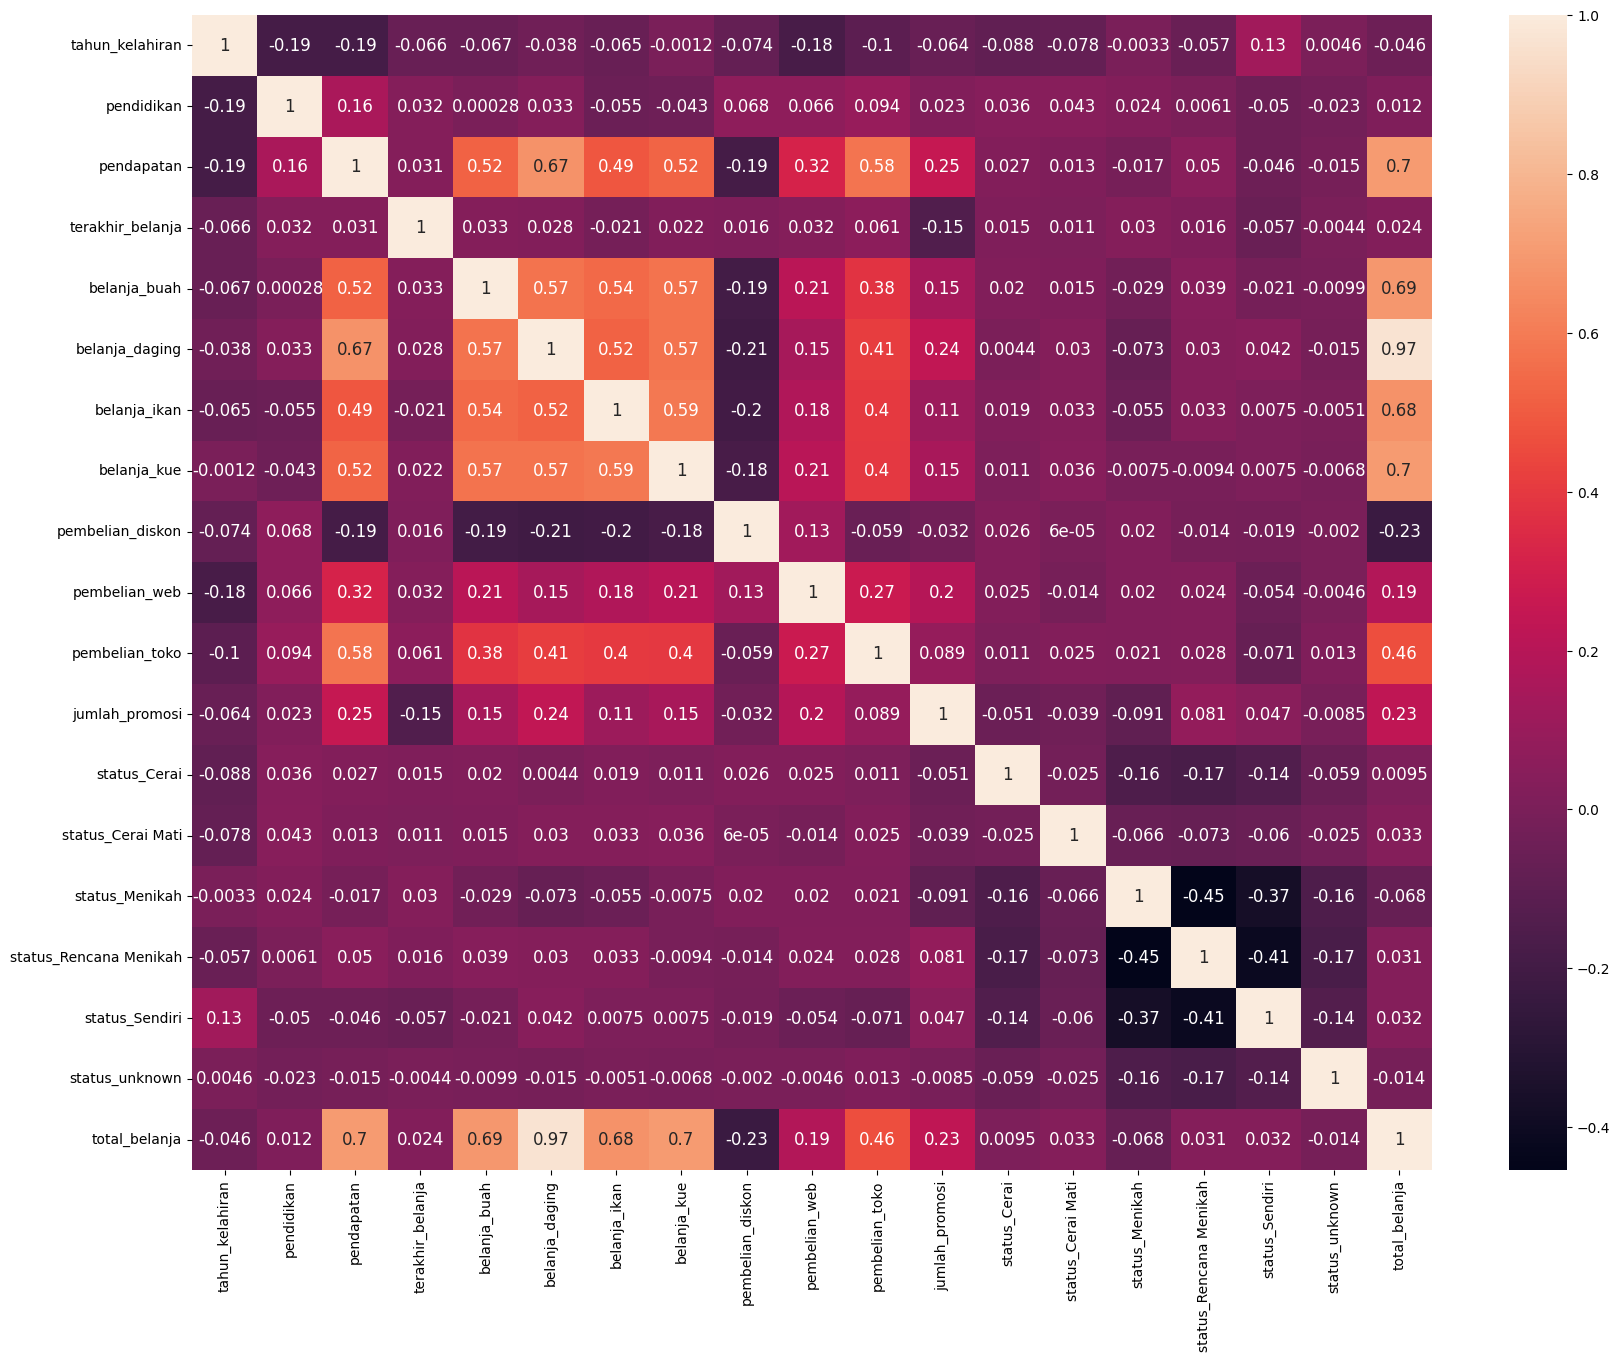

In [44]:
# Create heatmap to check correlation
cor = df_train1.corr()

plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True,annot_kws={'size':12})
plt.show()

## Feature Selection

In [45]:
df_train1.isnull().sum()

tahun_kelahiran           0
pendidikan                0
status_pernikahan         0
pendapatan                0
terakhir_belanja          0
belanja_buah              0
belanja_daging            0
belanja_ikan              0
belanja_kue               0
pembelian_diskon          0
pembelian_web             0
pembelian_toko            0
jumlah_promosi            0
status_Cerai              0
status_Cerai Mati         0
status_Menikah            0
status_Rencana Menikah    0
status_Sendiri            0
status_unknown            0
total_belanja             0
dtype: int64

In [46]:
df_train1 = df_train1.drop(columns=['tahun_kelahiran', 'pendidikan', 'status_pernikahan'])

In [47]:
df_train1

,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,jumlah_promosi,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri,status_unknown,total_belanja
0,1.144832e+08,47.2,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,2,0.0,0.0,0.0,1.0,0.0,0.0,382347.0
1,8.406300e+07,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0,0.0,0.0,0.0,1.0,0.0,0.0,151725.0
2,1.275326e+08,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,1,0.0,0.0,1.0,0.0,0.0,0.0,624985.0
3,1.655796e+08,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,4,0.0,0.0,0.0,1.0,0.0,0.0,1973840.0
4,1.177032e+08,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,4,0.0,0.0,0.0,1.0,0.0,0.0,476553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,7.819947e+07,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,5,0.0,0.0,1.0,0.0,0.0,0.0,41686.0
3810,1.093060e+08,44.0,0.0,50575.0,36054.5,0.0,3.0,6.0,3.0,1,0.0,0.0,0.0,1.0,0.0,0.0,86629.5
3811,1.046210e+08,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0,0.0,0.0,1.0,0.0,0.0,0.0,72828.0
3812,1.108500e+08,67.0,18207.0,70805.0,24276.0,27795.0,4.0,5.0,4.0,0,0.0,0.0,0.0,1.0,0.0,0.0,141083.0


In [48]:
def map_total_belanja(x):
    if x > 60:
        return 2
    elif 30 < x <= 60:
        return 1
    else:
        return 0

df_train1['terakhir_belanja'] = df_train1['terakhir_belanja'].apply(map_total_belanja)

In [48]:
df_train1

,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,jumlah_promosi,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri,status_unknown,total_belanja
0,1.144832e+08,47.2,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,2,0.0,0.0,0.0,1.0,0.0,0.0,382347.0
1,8.406300e+07,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0,0.0,0.0,0.0,1.0,0.0,0.0,151725.0
2,1.275326e+08,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,1,0.0,0.0,1.0,0.0,0.0,0.0,624985.0
3,1.655796e+08,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,4,0.0,0.0,0.0,1.0,0.0,0.0,1973840.0
4,1.177032e+08,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,4,0.0,0.0,0.0,1.0,0.0,0.0,476553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,7.819947e+07,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,5,0.0,0.0,1.0,0.0,0.0,0.0,41686.0
3810,1.093060e+08,44.0,0.0,50575.0,36054.5,0.0,3.0,6.0,3.0,1,0.0,0.0,0.0,1.0,0.0,0.0,86629.5
3811,1.046210e+08,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0,0.0,0.0,1.0,0.0,0.0,0.0,72828.0
3812,1.108500e+08,67.0,18207.0,70805.0,24276.0,27795.0,4.0,5.0,4.0,0,0.0,0.0,0.0,1.0,0.0,0.0,141083.0


# Modeling

## Outlier Handling

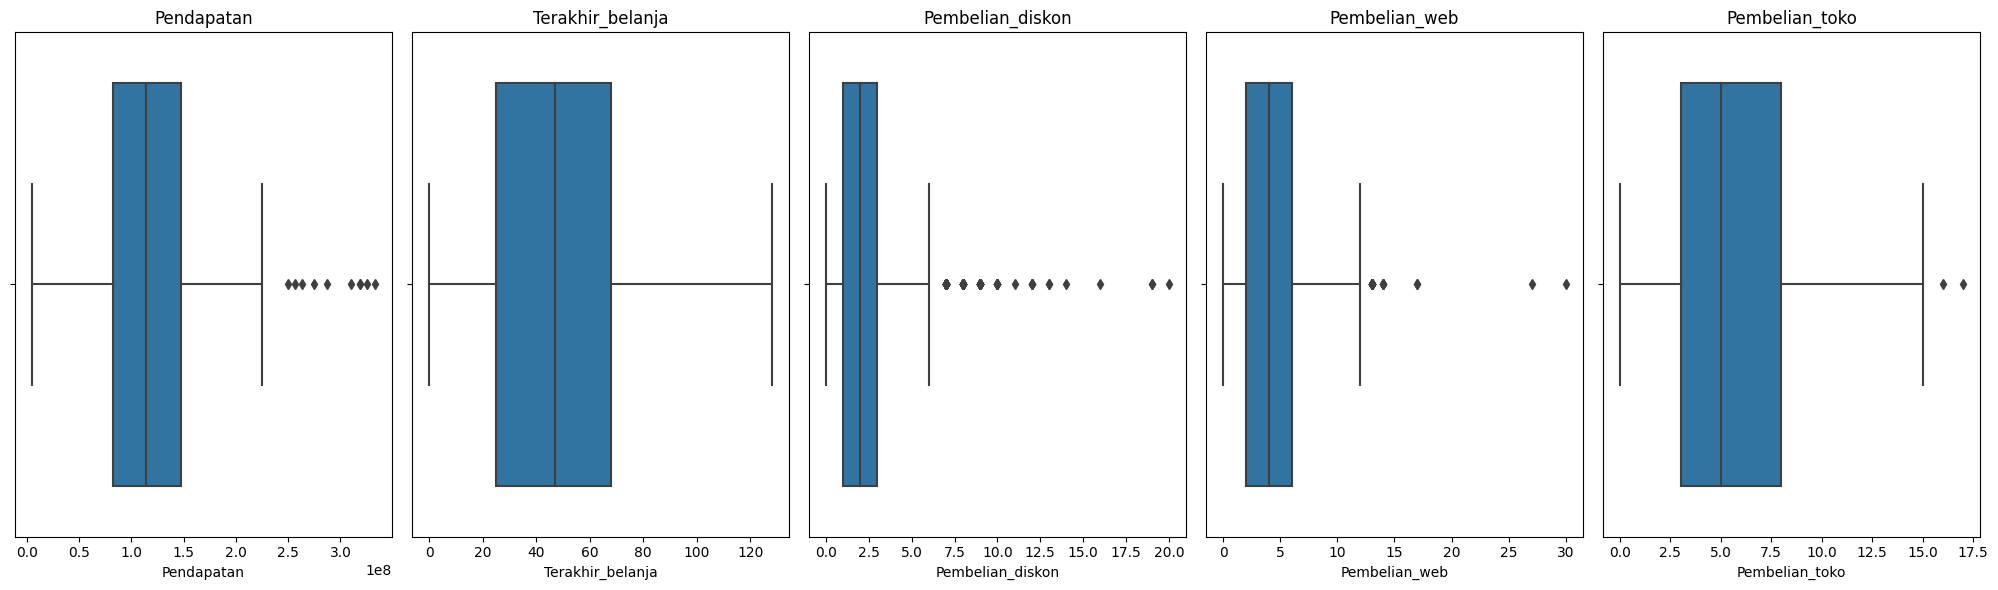

In [49]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

columns = ['pendapatan', 'terakhir_belanja', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko']

for i, column in enumerate(columns):
    sns.boxplot(x=df_train1[column], ax=axes[i])
    axes[i].set_title(column.capitalize())
    axes[i].set_xlabel(column.capitalize())

plt.tight_layout()
plt.show()


In [50]:
def detect_outliers_tukey(df, k=1.5):
    outliers_count = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        outliers_count[column] = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)].count()
    return outliers_count

outliers_count = detect_outliers_tukey(df_train1)

for column, count in outliers_count.items():
    print(f"Number of outliers in {column}: {count}")

Number of outliers in pendapatan: 10
Number of outliers in terakhir_belanja: 0
Number of outliers in belanja_buah: 286
Number of outliers in belanja_daging: 186
Number of outliers in belanja_ikan: 249
Number of outliers in belanja_kue: 315
Number of outliers in pembelian_diskon: 151
Number of outliers in pembelian_web: 23
Number of outliers in pembelian_toko: 2
Number of outliers in jumlah_promosi: 0
Number of outliers in status_Cerai: 214
Number of outliers in status_Cerai Mati: 40
Number of outliers in status_Menikah: 0
Number of outliers in status_Rencana Menikah: 0
Number of outliers in status_Sendiri: 0
Number of outliers in status_unknown: 212
Number of outliers in total_belanja: 55


In [51]:
Q1 = df_train1.quantile(0.25)
Q3 = df_train1.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_train1[(df_train1 < lower_bound) | (df_train1 > upper_bound)].any(axis=1)

df_train1 = df_train1[~outliers]

In [52]:
df_train1

,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,jumlah_promosi,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri,status_unknown,total_belanja
0,1.144832e+08,47.2,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,2,0.0,0.0,0.0,1.0,0.0,0.0,382347.0
2,1.275326e+08,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,1,0.0,0.0,1.0,0.0,0.0,0.0,624985.0
5,9.434610e+07,9.0,33509.0,49228.0,0.0,27795.0,1.0,4.0,2.0,5,0.0,0.0,0.0,0.0,1.0,0.0,110532.0
6,7.531300e+07,96.0,0.0,14161.0,8092.0,2023.0,1.0,4.0,5.0,0,0.0,0.0,0.0,0.0,1.0,0.0,24276.0
9,3.756750e+07,67.0,19061.0,28067.0,22223.0,14146.0,3.0,2.0,1.0,2,0.0,0.0,1.0,0.0,0.0,0.0,83497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807,5.028400e+07,0.0,12138.0,8092.0,8092.0,27795.0,0.0,0.0,5.0,0,0.0,0.0,0.0,0.0,1.0,0.0,56117.0
3808,1.650545e+08,11.0,37316.0,729052.0,45582.0,51913.0,1.0,3.0,8.0,5,0.0,0.0,1.0,0.0,0.0,0.0,863863.0
3809,7.819947e+07,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,5,0.0,0.0,1.0,0.0,0.0,0.0,41686.0
3810,1.093060e+08,44.0,0.0,50575.0,36054.5,0.0,3.0,6.0,3.0,1,0.0,0.0,0.0,1.0,0.0,0.0,86629.5


## Splitting Dataset

In [52]:
# Calculate the count of each unique value
counts = df_train1['jumlah_promosi'].value_counts()

# Find the minimum count
min_count = counts.min()

# Sample rows for each unique value to balance the counts
balanced_data = pd.concat([df_train1[df_train1['jumlah_promosi'] == value].sample(min_count, replace=True) for value in counts.index])

# Shuffle the rows in the balanced DataFrame
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)

In [53]:
balanced_data

,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,jumlah_promosi,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri,status_unknown,total_belanja
0,9.355400e+07,41.0,26299.0,360094.0,117334.0,27795.0,0.0,11.0,7.0,1,0.0,0.0,0.0,0.0,1.0,0.0,531522.0
1,8.596344e+07,66.0,1243.0,139552.0,16319.0,18647.0,6.0,7.0,3.0,6,0.0,0.0,1.0,0.0,0.0,0.0,175761.0
2,1.316360e+08,81.0,258944.0,441014.0,165886.0,16184.0,1.0,6.0,15.0,1,1.0,0.0,0.0,0.0,0.0,0.0,882028.0
3,7.398110e+07,6.0,2023.0,47271.0,1286.0,1473.0,3.0,0.0,5.0,0,0.0,0.0,0.0,0.0,0.0,1.0,52053.0
4,6.999600e+07,91.0,10115.0,176001.0,34391.0,6069.0,6.0,5.0,4.0,0,0.0,0.0,1.0,0.0,0.0,0.0,226576.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,1.144832e+08,32.0,4282.0,32761.0,10217.0,9721.0,2.0,4.0,3.0,2,0.0,0.0,0.0,1.0,0.0,0.0,56981.0
2698,1.192848e+08,26.0,89559.0,438008.0,43714.0,17955.0,2.0,3.0,11.0,4,0.0,0.0,0.0,1.0,0.0,0.0,589236.0
2699,3.896000e+07,65.0,22253.0,0.0,28322.0,6069.0,3.0,3.0,3.0,0,0.0,0.0,0.0,1.0,0.0,0.0,56644.0
2700,9.855400e+07,62.0,74851.0,157794.0,113288.0,30345.0,2.0,7.0,5.0,2,0.0,0.0,0.0,0.0,1.0,0.0,376278.0


In [57]:
df_train1 = balanced_data

In [58]:
df_train1.reset_index(drop=True)

,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,jumlah_promosi,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri,status_unknown,total_belanja
0,9.355400e+07,41.0,26299.0,360094.0,117334.0,27795.0,0.0,11.0,7.0,1,0.0,0.0,0.0,0.0,1.0,0.0,531522.0
1,8.596344e+07,66.0,1243.0,139552.0,16319.0,18647.0,6.0,7.0,3.0,6,0.0,0.0,1.0,0.0,0.0,0.0,175761.0
2,1.316360e+08,81.0,258944.0,441014.0,165886.0,16184.0,1.0,6.0,15.0,1,1.0,0.0,0.0,0.0,0.0,0.0,882028.0
3,7.398110e+07,6.0,2023.0,47271.0,1286.0,1473.0,3.0,0.0,5.0,0,0.0,0.0,0.0,0.0,0.0,1.0,52053.0
4,6.999600e+07,91.0,10115.0,176001.0,34391.0,6069.0,6.0,5.0,4.0,0,0.0,0.0,1.0,0.0,0.0,0.0,226576.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,1.144832e+08,32.0,4282.0,32761.0,10217.0,9721.0,2.0,4.0,3.0,2,0.0,0.0,0.0,1.0,0.0,0.0,56981.0
2698,1.192848e+08,26.0,89559.0,438008.0,43714.0,17955.0,2.0,3.0,11.0,4,0.0,0.0,0.0,1.0,0.0,0.0,589236.0
2699,3.896000e+07,65.0,22253.0,0.0,28322.0,6069.0,3.0,3.0,3.0,0,0.0,0.0,0.0,1.0,0.0,0.0,56644.0
2700,9.855400e+07,62.0,74851.0,157794.0,113288.0,30345.0,2.0,7.0,5.0,2,0.0,0.0,0.0,0.0,1.0,0.0,376278.0


In [59]:
X = df_train1.drop(columns='jumlah_promosi')
y = df_train1['jumlah_promosi']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

Train size: (3051, 12) (3051,)
Test size: (763, 12) (763,)


## Learning

In [60]:
params = {
    'n_estimators': 817,
    'max_depth': 10,
    'learning_rate': 0.11051976977950169,
    'subsample': 0.8822278347098856,
    'colsample_bytree': 0.9172931856489269,
    'min_child_weight': 1,
    'gamma': 0.013133477834279044,
    'reg_alpha': 0.08108905536786948,
    'reg_lambda': 0.9959481980452127,
    'max_delta_step': 0.11210426725635644,
}

xgb = XGBClassifier(**params)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scorer = make_scorer(score_func=accuracy_score)
accuracy_scores = cross_val_score(xgb, X, y, cv=cv, scoring=accuracy_scorer)

In [61]:
accuracy_scorer = make_scorer(score_func=accuracy_score)
accuracy_scores = cross_val_score(xgb, X, y, cv=cv, scoring=accuracy_scorer)

mean_accuracy = np.mean(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy}')

Mean Accuracy: 0.7901519819264736


In [62]:
xgb.fit(X,y) 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.9172931856489269, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.013133477834279044, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.11051976977950169, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0.11210426725635644,
              max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=817, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0.08108905536786948, ...)

# Fitting

## Samain Dataset

In [63]:
df_test.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [64]:
df_test1 = df_test[['ID','status_pernikahan', 'pendapatan', 'terakhir_belanja', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko']]
df_test1.head()

,ID,status_pernikahan,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko
0,2241,NaN,120660151.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0
1,2274,Menikah,163551821.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0
2,1107,Menikah,29857000.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0
3,4478,Menikah,117949098.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0
4,5080,Rencana Menikah,164761134.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0


In [65]:
df_test1.isnull().sum()/(len(df_test1))*100

ID                   0.000000
status_pernikahan    4.766894
pendapatan           5.316920
terakhir_belanja     5.264536
belanja_buah         4.871661
belanja_daging       5.107386
belanja_ikan         5.133578
belanja_kue          4.897852
pembelian_diskon     4.688318
pembelian_web        4.714510
pembelian_toko       4.871661
dtype: float64

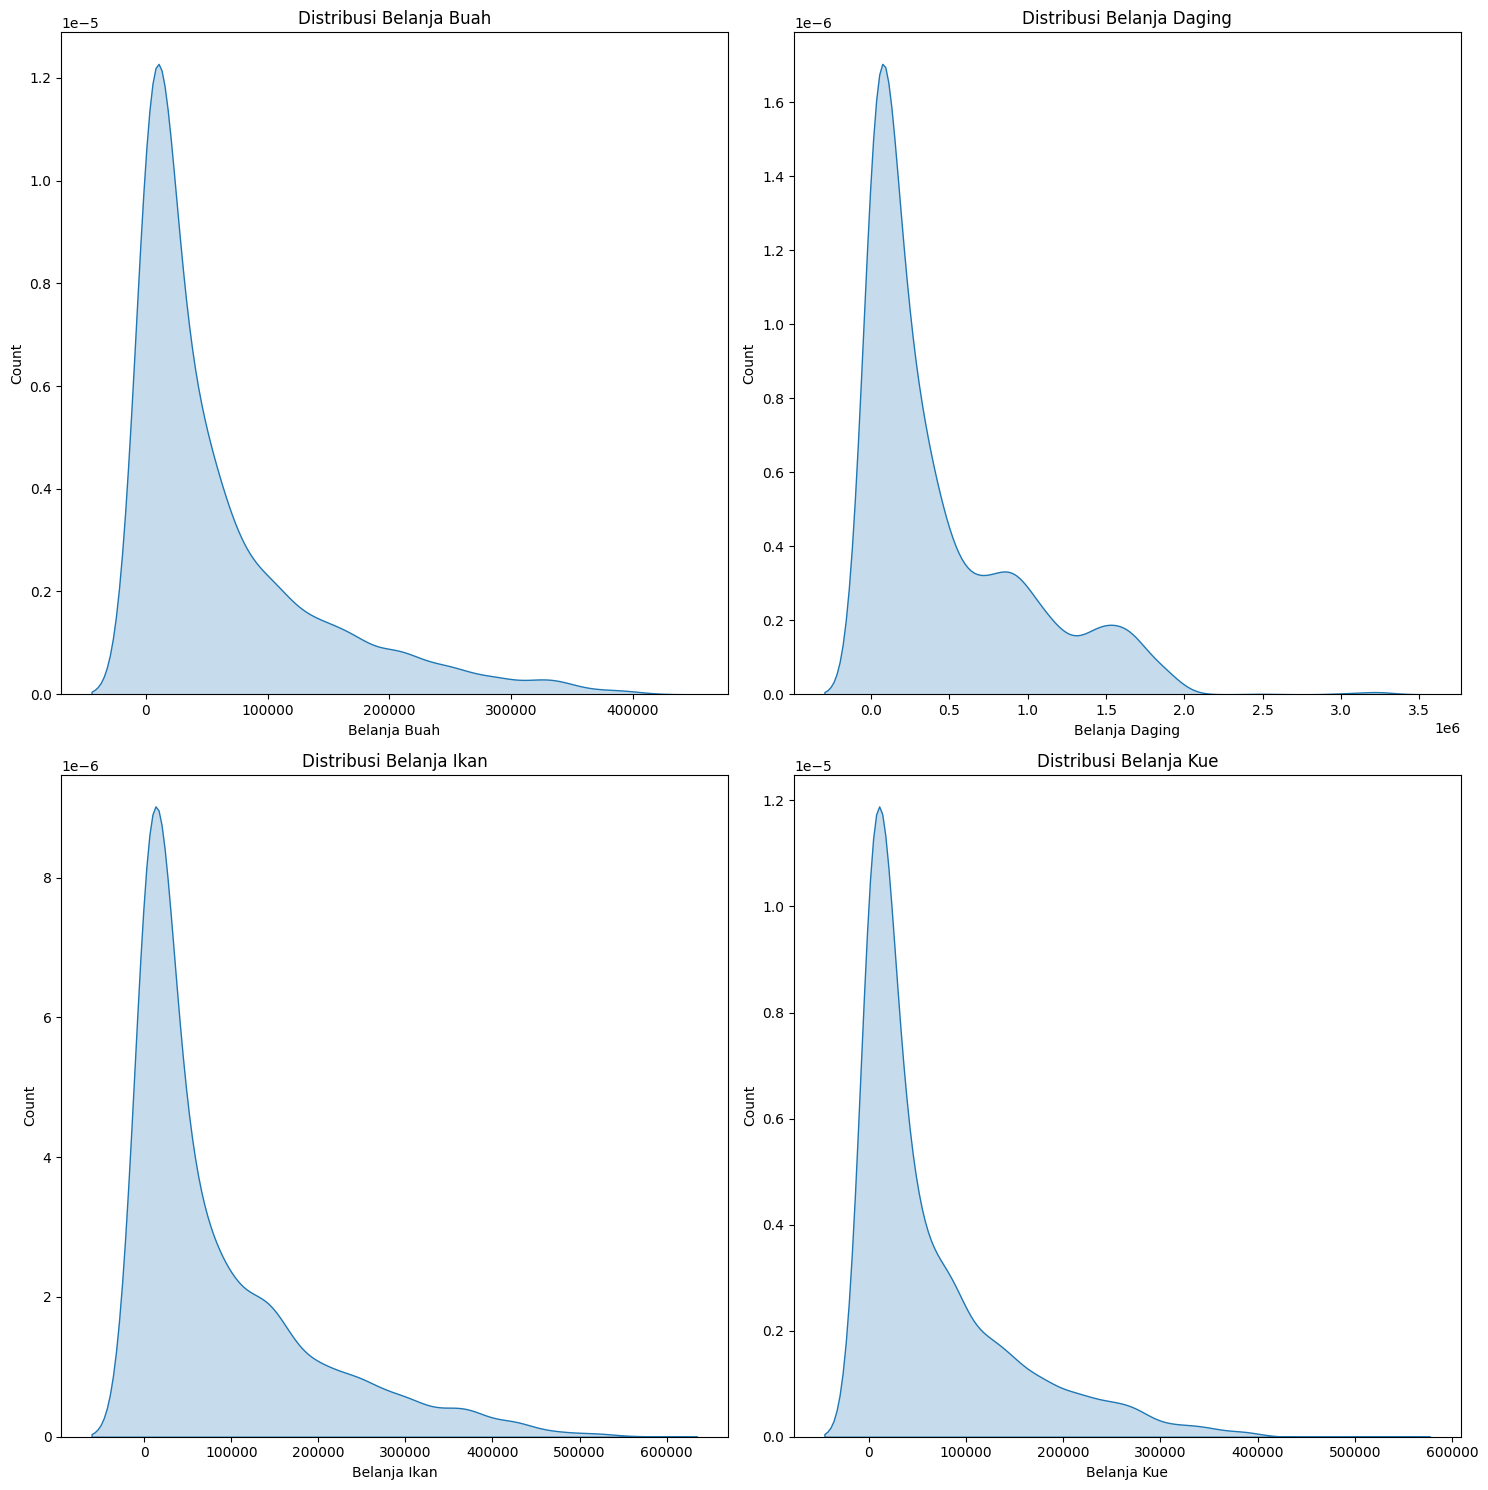

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.kdeplot(data=df_test1['belanja_buah'], shade=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribusi Belanja Buah')
axs[0, 0].set_xlabel('Belanja Buah')
axs[0, 0].set_ylabel('Count')

sns.kdeplot(data=df_test1['belanja_daging'], shade=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribusi Belanja Daging')
axs[0, 1].set_xlabel('Belanja Daging')
axs[0, 1].set_ylabel('Count')

sns.kdeplot(data=df_test1['belanja_ikan'], shade=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribusi Belanja Ikan')
axs[1, 0].set_xlabel('Belanja Ikan')
axs[1, 0].set_ylabel('Count')

sns.kdeplot(data=df_test1['belanja_kue'], shade=True, ax=axs[1,1])
axs[1,1].set_title('Distribusi Belanja Kue')
axs[1,1].set_xlabel('Belanja Kue')
axs[1,1].set_ylabel('Count')

plt.tight_layout()

plt.show()

In [67]:
df_test1[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']] = \
    df_test1[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].fillna(df_test1.median().round(1))

df_test1

C:\Users\GF63\AppData\Local\Temp\ipykernel_26304\1275601147.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_test1[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].fillna(df_test1.median().round(1))
C:\Users\GF63\AppData\Local\Temp\ipykernel_26304\1275601147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']] = \


,ID,status_pernikahan,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko
0,2241,NaN,120660151.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0
1,2274,Menikah,163551821.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0
2,1107,Menikah,29857000.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0
3,4478,Menikah,117949098.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0
4,5080,Rencana Menikah,164761134.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
3813,271,Sendiri,66320000.0,19.0,12138.0,38437.0,0.0,10115.0,4.0,0.0,6.0
3814,3334,Menikah,159651946.0,90.0,32119.0,1032587.0,176078.0,78693.0,0.0,6.0,8.0
3815,3478,Rencana Menikah,84058923.0,46.0,8198.0,47595.0,11392.0,10540.0,NaN,0.0,1.0
3816,89,Rencana Menikah,106301000.0,74.0,16184.0,78897.0,40025.5,0.0,3.0,5.0,3.0


In [68]:
knn_imputer = KNNImputer(n_neighbors=5)

columns_to_impute = ['pendapatan']

df_test1[columns_to_impute] = knn_imputer.fit_transform(df_test1[columns_to_impute])

C:\Users\GF63\AppData\Local\Temp\ipykernel_26304\3027561798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1[columns_to_impute] = knn_imputer.fit_transform(df_test1[columns_to_impute])


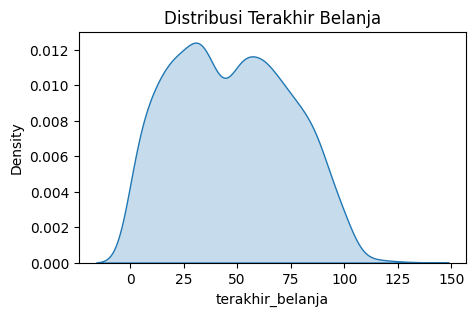

In [69]:
plt.figure(figsize=(5,3))
sns.kdeplot(data=df_test1['terakhir_belanja'], shade=True)
plt.title('Distribusi Terakhir Belanja')
plt.show()

In [70]:
df_test1['terakhir_belanja'].fillna(df_test1['terakhir_belanja'].mean().round(1), inplace=True)

C:\Users\GF63\AppData\Local\Temp\ipykernel_26304\3206899928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['terakhir_belanja'].fillna(df_test1['terakhir_belanja'].mean().round(1), inplace=True)


In [71]:
knn_imputer = KNNImputer(n_neighbors=5)

columns_to_impute = ['pembelian_diskon', 'pembelian_web', 'pembelian_toko']

df_test1[columns_to_impute] = knn_imputer.fit_transform(df_test1[columns_to_impute])

C:\Users\GF63\AppData\Local\Temp\ipykernel_26304\4121700701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1[columns_to_impute] = knn_imputer.fit_transform(df_test1[columns_to_impute])


In [72]:
df_test1['status_pernikahan'].value_counts()

Rencana Menikah    1272
Menikah            1126
Sendiri             972
Cerai               206
Cerai Mati           59
5                     1
Name: status_pernikahan, dtype: int64

In [73]:
df_test1['status_pernikahan'] = df_test1['status_pernikahan'].replace('5', 'unknown')

C:\Users\GF63\AppData\Local\Temp\ipykernel_26304\4117006151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['status_pernikahan'] = df_test1['status_pernikahan'].replace('5', 'unknown')


In [74]:
df_test1['status_pernikahan'] = df_test1['status_pernikahan'].fillna('unknown')

C:\Users\GF63\AppData\Local\Temp\ipykernel_26304\173536843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['status_pernikahan'] = df_test1['status_pernikahan'].fillna('unknown')


In [75]:
pernikahan_test = df_test1[['status_pernikahan']]
pernikahan_test

,status_pernikahan
0,unknown
1,Menikah
2,Menikah
3,Menikah
4,Rencana Menikah
...,...
3813,Sendiri
3814,Menikah
3815,Rencana Menikah
3816,Rencana Menikah


In [76]:
hotencoder = OneHotEncoder(sparse=False)
pernikahan_encoded = hotencoder.fit_transform(pernikahan_test)
pernikahan_encoded

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [77]:
pernikahan_encoded_df = pd.DataFrame(pernikahan_encoded, columns=hotencoder.get_feature_names(['status']))
pernikahan_encoded_df

C:\Users\GF63\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri,status_unknown
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
3813,0.0,0.0,0.0,0.0,1.0,0.0
3814,0.0,0.0,1.0,0.0,0.0,0.0
3815,0.0,0.0,0.0,1.0,0.0,0.0
3816,0.0,0.0,0.0,1.0,0.0,0.0


In [78]:
df_test1 = pd.concat([df_test1.reset_index(drop=True), pernikahan_encoded_df.reset_index(drop=True)], axis=1)
df_test1.head()

,ID,status_pernikahan,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri,status_unknown
0,2241,unknown,120660151.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2274,Menikah,163551821.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1107,Menikah,29857000.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4478,Menikah,117949098.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5080,Rencana Menikah,164761134.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0


In [79]:
df_test1['total_belanja'] = df_test1[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].sum(axis=1)

In [80]:
df_test1.head()

,ID,status_pernikahan,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri,status_unknown,total_belanja
0,2241,unknown,120660151.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,962173.0
1,2274,Menikah,163551821.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,493573.0
2,1107,Menikah,29857000.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,86989.0
3,4478,Menikah,117949098.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,140678.0
4,5080,Rencana Menikah,164761134.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,2103642.0


In [81]:
df_train1.head()

,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,jumlah_promosi,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri,status_unknown,total_belanja
0,93554000.0,41.0,26299.0,360094.0,117334.0,27795.0,0.0,11.0,7.0,1,0.0,0.0,0.0,0.0,1.0,0.0,531522.0
1,85963436.0,66.0,1243.0,139552.0,16319.0,18647.0,6.0,7.0,3.0,6,0.0,0.0,1.0,0.0,0.0,0.0,175761.0
2,131636000.0,81.0,258944.0,441014.0,165886.0,16184.0,1.0,6.0,15.0,1,1.0,0.0,0.0,0.0,0.0,0.0,882028.0
3,73981101.0,6.0,2023.0,47271.0,1286.0,1473.0,3.0,0.0,5.0,0,0.0,0.0,0.0,0.0,0.0,1.0,52053.0
4,69996000.0,91.0,10115.0,176001.0,34391.0,6069.0,6.0,5.0,4.0,0,0.0,0.0,1.0,0.0,0.0,0.0,226576.0


In [82]:
df_test1.drop(columns='ID', inplace=True)

In [83]:
df_test1.drop(columns='status_pernikahan', inplace=True)

In [84]:
df_test1

,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri,status_unknown,total_belanja
0,120660151.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,962173.0
1,163551821.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,493573.0
2,29857000.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,86989.0
3,117949098.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,140678.0
4,164761134.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,2103642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,66320000.0,19.0,12138.0,38437.0,0.0,10115.0,4.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,60690.0
3814,159651946.0,90.0,32119.0,1032587.0,176078.0,78693.0,0.0,6.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,1319477.0
3815,84058923.0,46.0,8198.0,47595.0,11392.0,10540.0,1.8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,77725.0
3816,106301000.0,74.0,16184.0,78897.0,40025.5,0.0,3.0,5.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,135106.5


In [85]:
pred = xgb.predict(df_test1)
pred

array([0, 5, 2, ..., 2, 4, 6], dtype=int64)

In [86]:
df_result = pd.DataFrame(pred, columns=['jumlah_promosi'])

In [87]:
df_result

,jumlah_promosi
0,0
1,5
2,2
3,4
4,4
...,...
3813,0
3814,2
3815,2
3816,4


In [88]:
col_id = df_test['ID']
df_result = pd.concat([col_id, df_result], axis=1)
df_result

,ID,jumlah_promosi
0,2241,0
1,2274,5
2,1107,2
3,4478,4
4,5080,4
...,...,...
3813,271,0
3814,3334,2
3815,3478,2
3816,89,4


In [89]:
df_result

,ID,jumlah_promosi
0,2241,0
1,2274,5
2,1107,2
3,4478,4
4,5080,4
...,...,...
3813,271,0
3814,3334,2
3815,3478,2
3816,89,4


In [90]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              3818 non-null   int64
 1   jumlah_promosi  3818 non-null   int64
dtypes: int64(2)
memory usage: 59.8 KB


In [91]:
df_result['jumlah_promosi'] = df_result['jumlah_promosi'].astype(int)

In [92]:
df_result.to_csv('submission/3_balance.csv', index=False)

In [93]:
print(pd.read_csv('submission/3_balance.csv'))

        ID  jumlah_promosi
0     2241               0
1     2274               5
2     1107               2
3     4478               4
4     5080               4
...    ...             ...
3813   271               0
3814  3334               2
3815  3478               2
3816    89               4
3817  2151               6

[3818 rows x 2 columns]


In [75]:
pd.read_csv('submission/1_basiclinreg.csv')

,ID,jumlah_promosi
0,2241,3.0
1,2274,3.0
2,1107,1.0
3,4478,3.0
4,5080,3.0
...,...,...
3813,271,2.0
3814,3334,3.0
3815,3478,2.0
3816,89,2.0


In [79]:
df_fix = pd.read_csv('submission/1_basiclinreg.csv')

In [80]:
df_fix

,ID,jumlah_promosi
0,2241,3.0
1,2274,3.0
2,1107,1.0
3,4478,3.0
4,5080,3.0
...,...,...
3813,271,2.0
3814,3334,3.0
3815,3478,2.0
3816,89,2.0


In [81]:
df_fix['jumlah_promosi'] = df_fix['jumlah_promosi'].astype(int)

In [82]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              3818 non-null   int64
 1   jumlah_promosi  3818 non-null   int32
dtypes: int32(1), int64(1)
memory usage: 44.9 KB


In [83]:
df_fix.to_csv('submission/cepat.csv', index=False)

In [84]:
pd.read_csv('submission/cepat.csv')

,ID,jumlah_promosi
0,2241,3
1,2274,3
2,1107,1
3,4478,3
4,5080,3
...,...,...
3813,271,2
3814,3334,3
3815,3478,2
3816,89,2
